# Practica 2
#### Perform following Data Pre-processing tasks using python
Data reduction using variance threshold, univariate feature selection,
recursive feature elimination, PCA, correlation

In [ ]:
# Assign X as a DataFrame of features and y as a Series of the outcome variable
X1 = X.drop('income', 1)
Y1 = X.income

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, Y1, train_size=0.70, random_state=1)
X_train.shape

(22792, 66)

## Univariate feature selection

In [ ]:
import sklearn.feature_selection

select = sklearn.feature_selection.SelectKBest(k=20)
selected_features = select.fit(X_train, y_train)
indices_selected = selected_features.get_support(indices=True)
colnames_selected = [X.columns[i] for i in indices_selected]

X_train_selected = X_train[colnames_selected]
X_test_selected = X_test[colnames_selected]

print(X_train_selected.shape)
print(X_test_selected.shape)

(22792, 20)
(9769, 20)


In [ ]:
colnames_selected

['age',
 'educational-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'workclass_ Never-worked',
 'workclass_ Private',
 'education_ Assoc-voc',
 'education_ HS-grad',
 'education_ Preschool',
 'marital-status_ Married-AF-spouse',
 'marital-status_ Married-spouse-absent',
 'occupation_ Craft-repair',
 'occupation_ Machine-op-inspct',
 'occupation_ Transport-moving',
 'relationship_ Husband',
 'relationship_ Other-relative',
 'relationship_ Own-child',
 'race_ White',
 'gender_ Female']

## Correlations

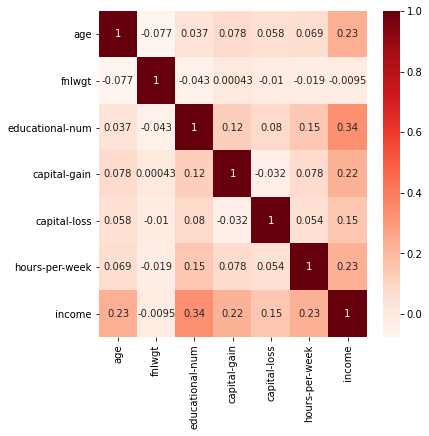

In [ ]:
#get correlations of each features in dataset
plt.figure(figsize=(6,6))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
#Correlation with output variable
cor_target = abs(cor["income"])

#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.2]
relevant_features

age                0.234037
educational-num    0.335154
capital-gain       0.223329
hours-per-week     0.229689
income             1.000000
Name: income, dtype: float64

## Recursive feature elimination

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# define model
rfc = RandomForestClassifier(n_estimators=20)

# feature extraction
rfe = RFE(rfc, n_features_to_select=20)

# fit on train set
fit = rfe.fit(X_train, y_train)

# Selected columns
indices_selected = fit.get_support(indices=True)
colnames_selected = [X.columns[i] for i in indices_selected]

# transform train set
X_train_selected1 = X_train[colnames_selected]
X_test_selected1 = X_test[colnames_selected]

print(X_train_selected1.shape)
print(X_test_selected1.shape)

(22792, 20)
(9769, 20)


In [ ]:
X_train_selected1.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_ Never-worked,workclass_ Self-emp-inc,education_ Assoc-voc,education_ Doctorate,marital-status_ Married-AF-spouse,marital-status_ Married-spouse-absent,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Priv-house-serv,occupation_ Protective-serv,occupation_ Transport-moving,relationship_ Unmarried,race_ Other,native-country_Other
16525,44,64632,16,0,0,60,0,1,0,1,0,0,0,0,0,0,0,0,0,0
14551,22,211361,13,0,0,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0
518,21,204226,10,0,0,35,0,0,0,0,0,0,0,0,0,0,0,1,0,0
22524,46,330416,10,0,0,40,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11425,17,226717,8,0,0,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Dimensionality reduction using PCA

In [ ]:
X.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,marital-status_ Divorced,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,gender_ Female,gender_ Male,native-country_Other,native-country_United-State
0,39,77516,13,2174,0,40,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1
1,50,83311,13,0,0,13,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1
2,38,215646,9,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1
3,53,234721,7,0,0,40,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1
4,28,338409,13,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0


In [ ]:
# Use PCA from sklearn.decompostion to find principal components
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
X_pca = pd.DataFrame(pca.fit_transform(X))

In [ ]:
X_pca.shape

(32561, 10)

In [ ]:
X_pca.head()

,0,1,2,3,4,5,6,7,8,9
0,-112262.329664,1099.917210,-89.796509,-0.816838,-0.386269,-2.888413,0.516148,1.105198,0.029501,0.604550
1,-106467.395741,-1074.257795,-93.353790,2.951972,-29.134382,-3.758901,-1.355852,0.124687,0.011962,0.708004
2,25867.604154,-1078.283629,-88.157944,-0.025606,-0.110191,1.027459,0.362269,0.750412,-0.807488,-0.130553
3,44942.603983,-1078.862072,-87.382487,14.594969,-4.240718,3.000437,-0.647688,-0.022839,0.292178,-0.239353
4,148630.604092,-1082.021027,-83.374542,-8.371596,2.626811,-3.240975,0.318030,-1.306313,0.043868,-0.393346
